In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 


In [201]:
dt_prin = pd.read_csv('kc_house_data.csv')
dt_prin.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [202]:
dt= dt_prin.copy()
dt.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h1>I.VISUALISATION ET PRETRAITEMENT DE DONNEES</h1>

<h3>1.PRETRAITEMENT DE DONNEES</h3>

In [203]:
dt.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [204]:
dt.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [205]:
dt.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [206]:
dt.duplicated().sum()

0

<h3>COMPREHENSION DES DIFFERENTS VARIABLE</h3>

In [207]:
dt.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<p><strong>id :</strong>Represente l'identifiant de la maison</p>
<p><strong>date :</strong>Represente Date à laquelle la maison a été vendue</p>    
<p><strong>price :</strong>Represente le Prix de la maison vendue</p>
<p><strong>bedroom :</strong>Represente le Nombre de chambres</p>
<p><strong>bathroom :</strong>Represente le Nombre de salles de bains</p>
<p><strong>sqft_living :</strong>Represente la Superficie en pieds carrés du salon</p>
<p><strong>sqft_lot :</strong>Represente la Superficie en pieds carrés de la bûche</p>
<p><strong>floors :</strong>Represente Nombre total d’étages dans la maison</p>
<p><strong>waterfront :</strong>Represente Si la maison a une vue sur le front de mer</p>
<p><strong>condition :</strong>Represente l'État de la maison</p>
<p><strong>grade :</strong>Represente l'identifiant de la maison</p>    
<p><strong>sqft_above :</strong>Represente la Superficie en pieds carrés de la maison en dehors du sous-sol</p>    
<p><strong>sqft_basement :</strong>Represente la Superficie en pieds carrés du sous-sol</p>    
<p><strong>yr_built :</strong>Represente l'Année de construction</p>
<p><strong>yr_renovated :</strong>Represente l'Année de rénovation de la maison</p>    
<p><strong>zipcode :</strong>Represente le code postal de la maison</p> 
<p><strong>lat :</strong>Represente Coordonnée latitude</p>
<p><strong>long :</strong>Represente Coordonnée longitude</p>       
<p><strong>sqft_living15 :</strong>Represente Salon en 2015 </p>    
<p><strong>sqft_lot15 :</strong>Represente terrain en 2015</p>    

<h3>SUPPRESSION DES DONNEES UNITILE</h3>

In [208]:
dt.drop(['id','date'],axis=1,inplace=True)

In [209]:
dt.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [210]:
dt['sqft_living15'].unique()

array([1340, 1690, 2720, 1360, 1800, 4760, 2238, 1650, 1780, 2390, 2210,
       1330, 1370, 2140, 1890, 1610, 1060, 1280, 1400, 4110, 2240, 1220,
       2200, 1030, 1760, 1860, 1520, 2630, 2580, 1390, 1460, 1570, 2020,
       1590, 2160, 1730, 1290, 2620, 2470, 2410, 3625, 1580, 3050, 1228,
       2680,  970, 1190, 1990, 1410, 1480, 2730, 1950, 2250, 2690, 2960,
       2270, 2570, 2500, 1440, 2750, 2221, 1010, 3390, 3530, 1640, 1510,
       2420, 1940, 3240, 1680,  890, 1130, 3350, 2350, 1870, 1720, 1850,
       1900, 1980, 2520, 1350, 1750, 1160, 2550, 2370, 1240, 1270, 2990,
       1380, 1540, 2090, 2640, 1830, 1620, 1880, 2340, 1710, 2700, 3060,
       2660, 1700, 1970, 1420, 2060, 2480, 1550, 1170, 2820, 1560, 2230,
       2840, 1450, 1500, 3160, 1200, 3400, 2110, 2920, 1770, 1070, 1930,
       3740, 2260, 1670, 2290, 1050, 2540, 2190, 2030, 1230, 2330, 1300,
       1430, 2770, 1250, 1630, 2590, 2130, 1100, 3836, 1320, 2120, 3070,
       1910, 2080, 1960, 2280, 1150, 3430, 2070, 26

<h3>2.VISUALISATION DE DONNEES</h3>

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

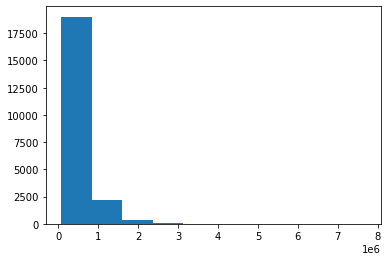

In [211]:
plt.hist(dt['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

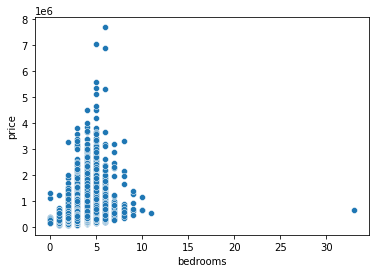

In [212]:
sns.scatterplot(x='bedrooms',y='price', data=dt)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

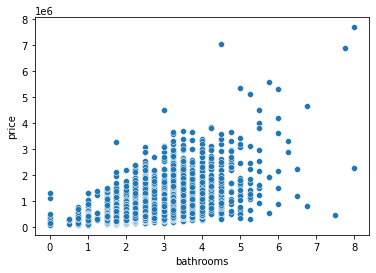

In [213]:
sns.scatterplot(x='bathrooms',y='price', data=dt)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

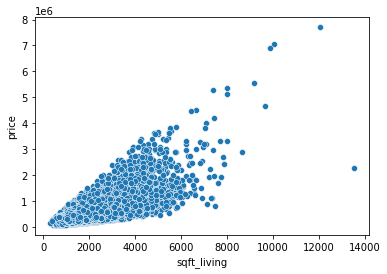

In [214]:
sns.scatterplot(x='sqft_living',y='price', data=dt)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

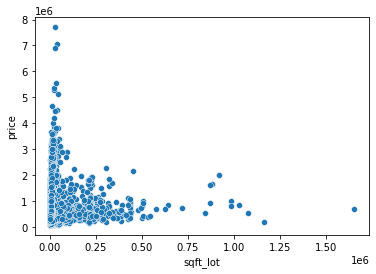

In [215]:
sns.scatterplot(x='sqft_lot',y='price', data=dt)

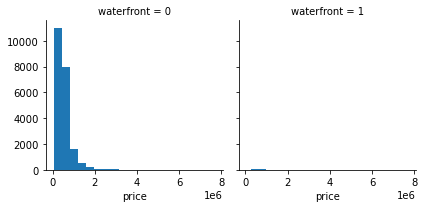

In [216]:
df_age_surv = sns.FacetGrid(dt,col="waterfront")
df_age_surv.map(plt.hist,'price',bins=20)

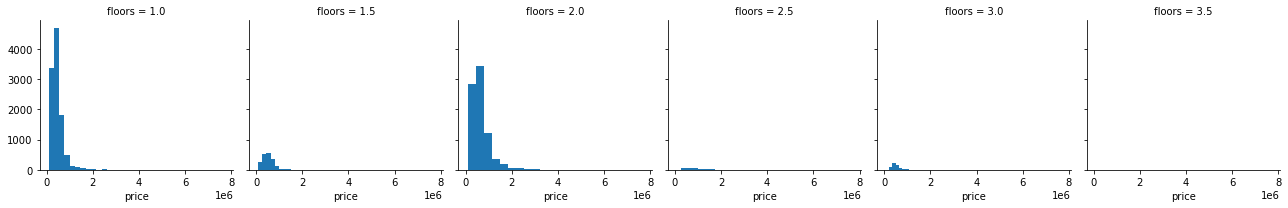

In [217]:
df_age_surv = sns.FacetGrid(dt,col="floors")
df_age_surv.map(plt.hist,'price',bins=20)

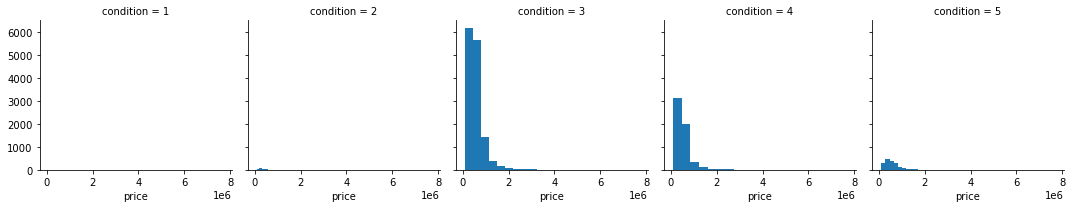

In [218]:
df_age_surv = sns.FacetGrid(dt,col="condition")
df_age_surv.map(plt.hist,'price',bins=20)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

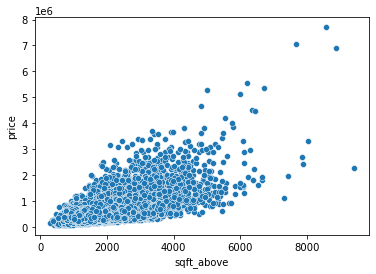

In [219]:
sns.scatterplot(x='sqft_above',y='price', data=dt)

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

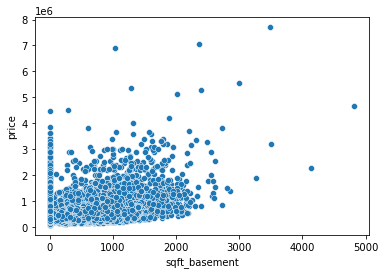

In [220]:
sns.scatterplot(x='sqft_basement',y='price', data=dt)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

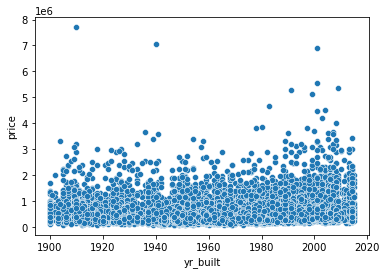

In [221]:
sns.scatterplot(x='yr_built',y='price',data=dt)

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

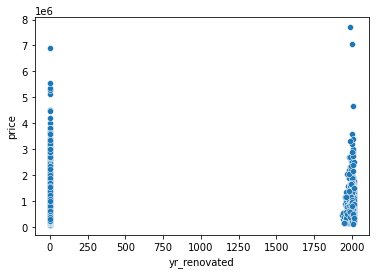

In [222]:
sns.scatterplot(x='yr_renovated',y='price',data=dt)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

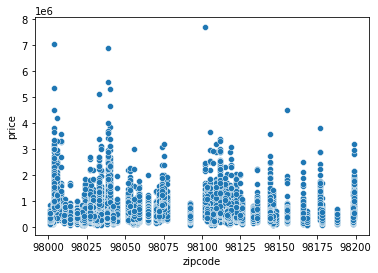

In [223]:
sns.scatterplot(x='zipcode',y='price',data=dt)

<AxesSubplot:xlabel='lat', ylabel='price'>

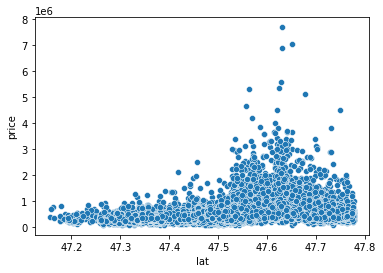

In [224]:
sns.scatterplot(x='lat',y='price',data=dt)

<AxesSubplot:xlabel='long', ylabel='price'>

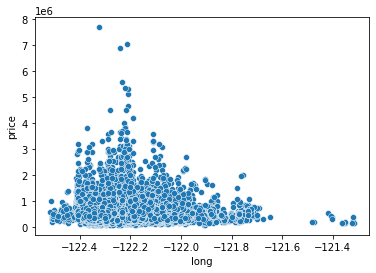

In [225]:
sns.scatterplot(x='long',y='price',data=dt)

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

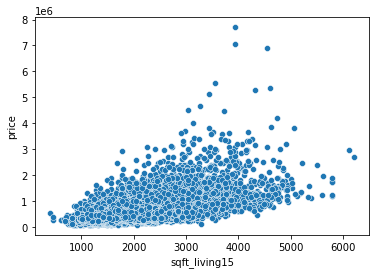

In [226]:
sns.scatterplot(x='sqft_living15',y='price',data=dt)

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

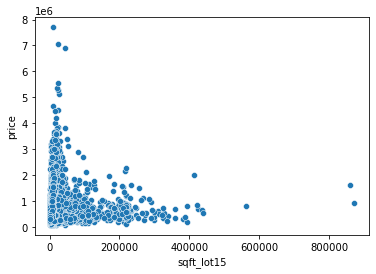

In [227]:
sns.scatterplot(x='sqft_lot15',y='price',data=dt)

<AxesSubplot:>

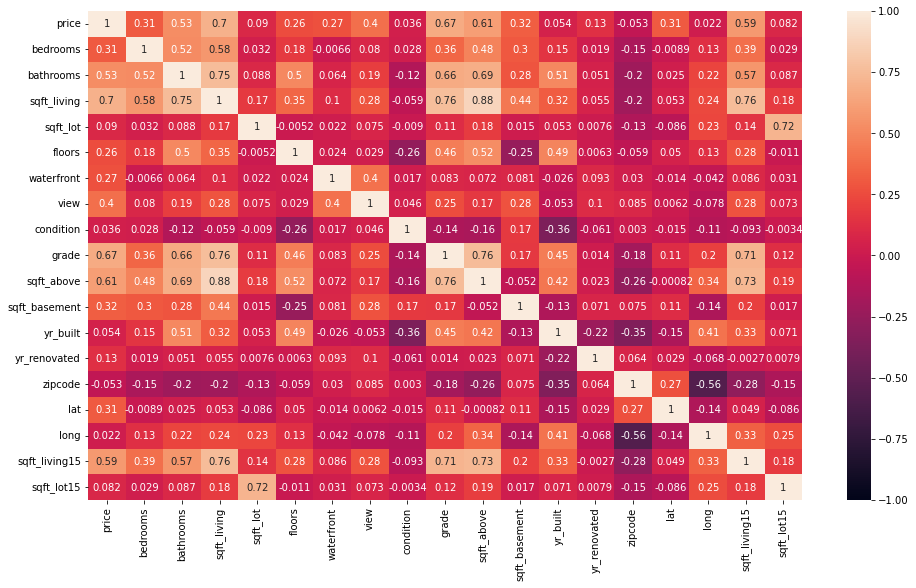

In [228]:
plt.figure(figsize=(16,9))
sns.heatmap(dt.corr(),vmin=-1,vmax=1,annot=True)

<h1>II.SELECTION DES FONCTIONNALITES</h1>

<p>D'après le graphique ci-dessus les variable ayant un fort corellation avec notre target sont les suivants:</p>
<ul>
    <li>bedrooms</li>
    <li>bathrooms</li>
    <li>sqft_living</li>
    <li>floors</li>
    <li>grade</li>
    <li>sqft_above</li>
    <li>sqft_basement</li>
    <li>lat</li>
    <li>sqft_living</li>  
</ul>
<p>De ce fait ce sont avec ces paragraphe que nous allons travailler</p>

<h3>APPLIQUONS LA REGRESSION LINEAIRE</h3>

In [249]:
x_lineaire=dt['sqft_living'].values[:,np.newaxis]
y=dt['price']

<h3>DIVISION DES DONNES EN ENSEMBLE D'APPRENTISSAGE ET DE TEST</h3>

In [250]:
x_trainlin,x_testlin,y_trainlin,y_testlin=train_test_split(x_lineaire,y,test_size=0.30,random_state=40)


<h3>APPLICATION DU MODEL DE REGRESSION LINEAIRE</h3>

In [252]:
model = LinearRegression()
model.fit(x_trainlin,y_trainlin)

LinearRegression()

In [253]:
predictionLinear= model.predict(x_testlin)

<h3>TRACONS LA REGRESSION LINEAIRE</h3>

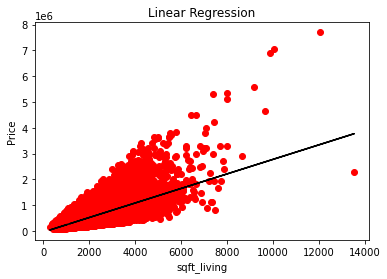

In [254]:
plt.scatter(x_lineaire,y_lineaire,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(x_lineaire,model.predict(x_lineaire),color="k")
plt.show()

<h3>MESURE DE LA PERFORMANCE</h3>

In [255]:
metrics.r2_score(y_testlin,predictionLinear)

0.5053104226540768

<h3>APPLIQUONS LA REGRESSION LINEAIRE MULTIPLE</h3>

In [256]:
x_lineaireMul=dt[['sqft_living','grade','sqft_above','sqft_living15','lat','sqft_basement','floors','bedrooms','bathrooms']]


In [257]:
x_trainlinMul,x_testlinMul,y_trainlinMul,y_testlinMul=train_test_split(x_lineaireMul,y,test_size=0.30,random_state=40)


In [258]:
model.fit(x_trainlinMul,y_trainlinMul)

LinearRegression()

In [259]:
predictionLinearMul= model.predict(x_testlinMul)

In [260]:
metrics.r2_score(y_testlinMul,predictionLinearMul)

0.6142798278773582

<h3>COMPARAISON LES RESULTAT DE LA REGRESSION LINEAIRE ET CELLE DE LA REGRESSION LINEAIRE MULTIPLE</h3>

<p>On constate la performance de notre apprentissage avec la regression lineaire est 
complement fausse, alors que avec la regression lineaire multiple on constate que l'apprentissage ce passe bien même si il y a quelque erreur encore </p>

<h3>APPLIQUONS LA REGRESSION POLYNOMIALE</h3>

In [267]:
poly = PolynomialFeatures() 

In [268]:
x_poly=poly.fit_transform(x_lineaireMul)

In [269]:
x_trainpoly,x_testpoly,y_trainpoly,y_testpoly=train_test_split(x_poly,y,test_size=0.30,random_state=40)


In [270]:
model.fit(x_poly,y)

LinearRegression()

In [271]:
predictionpoly= model.predict(x_testpoly)

In [272]:
metrics.r2_score(y_testpoly,predictionpoly)

0.7036266450273003

<h3>COMPARAISON LES RESULTAT DE LA REGRESSION LINEAIRE ET CELLE DE LA REGRESSION LINEAIRE MULTIPLE ET POLYNOMIALE</h3>

<p>On constate la performance de notre apprentissage avec la regression polynomiale est superieur a celle de la regression lineaire et lineaire multiple </p>
